<b> task 1.
import necessary libraries </b>


In [38]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
#import os
import seaborn as sns
import warnings

In [40]:
warnings.filterwarnings('ignore')

<b>
    task 2.
    reading data</b>

In [41]:
data= pd.read_excel('Sales_project.xlsx')
sales_oder= pd.read_excel('Sales_project.xlsx','Sales Orders Sheet')
customers=pd.read_excel('Sales_project.xlsx', 'Customers Sheet')
site_location= pd.read_excel('Sales_project.xlsx','Site Location sheet')
products= pd.read_excel('Sales_project.xlsx', 'Products_Sheet')
sales_team= pd.read_excel('Sales_project.xlsx','Sales Team Sheet')

In [3]:
"unique unit cost", len(set(sales_oder['Unit Cost'])),"unique unit price", len(set(sales_oder['Unit Price'])),"unique order number", len(set(sales_oder['OrderNumber']))


('unique unit cost',
 5581,
 'unique unit price',
 664,
 'unique order number',
 7991)

In [4]:
#as productid is in object datatype, we add another column for index, this will help us to merge it with other filles.

products_index = [a for a in range(len(products))]
products['products_index'] = products_index
#products.head()

In [5]:
# marging data in single file to make it easy to access them

df= sales_oder.join(customers.set_index('_CustomerID'), on= '_CustomerID').join(site_location.set_index('_SiteID'), on= '_SiteID').join(sales_team.set_index('_SalesAM_ID'), on= '_SalesAM_ID').join(products.set_index('products_index'), on='_ProductID', lsuffix='_left', rsuffix='_right', how='left')
df.head()

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth
0,SO - 000101,2018-05-31,RWF,6,15,259,12,5,0.075,1963.1,1001.181,Rochester Ltd,Y,Kicukiro,Joshua Bennett,I0090,Fiber Broadband Internet,FIBER INTERNET 1MBPS,1
1,SO - 000102,2018-05-31,RWF,14,20,196,27,3,0.075,3939.6,3348.660,Pacific Ltd,N,Rwamagana,Paul Holmes,I0239,Video Conferencing Service,VIDEO CONFERENCE,0
2,SO - 000103,2018-05-31,RWF,21,16,213,16,1,0.050,1775.5,781.220,"3LAB, Ltd",E,Gakenke,Samuel Fowler,I0094,Fiber Broadband Internet,FIBER INTERNET 10MBPS,10
3,SO - 000104,2018-05-31,RWF,28,48,107,23,8,0.075,2324.9,1464.687,"Fenwal, Corp",C,Gasabo,Carlos Miller,I0167,MSS,MSS GOLD,0
4,SO - 000105,2018-05-31,RWF,22,49,111,26,8,0.100,1822.4,1476.144,Bare,G,Gasabo,Joe Price,I0230,VOIP,VOIP PHONES 21-40,0


<b> task3.  augment data</b>

In [7]:
# tasks
# adding relevent columns
#add another column for sales
df['sales']= (df['Order Quantity']* df['Unit Price'])-df['Discount Applied']

#add another column for months
df['month'] = pd.DatetimeIndex(df['OrderDate']).month
df.head()


,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,...,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth,sales,month
0,SO - 000101,2018-05-31,RWF,6,15,259,12,5,0.075,1963.1,...,Rochester Ltd,Y,Kicukiro,Joshua Bennett,I0090,Fiber Broadband Internet,FIBER INTERNET 1MBPS,1,9815.425,5
1,SO - 000102,2018-05-31,RWF,14,20,196,27,3,0.075,3939.6,...,Pacific Ltd,N,Rwamagana,Paul Holmes,I0239,Video Conferencing Service,VIDEO CONFERENCE,0,11818.725,5
2,SO - 000103,2018-05-31,RWF,21,16,213,16,1,0.050,1775.5,...,"3LAB, Ltd",E,Gakenke,Samuel Fowler,I0094,Fiber Broadband Internet,FIBER INTERNET 10MBPS,10,1775.450,5
3,SO - 000104,2018-05-31,RWF,28,48,107,23,8,0.075,2324.9,...,"Fenwal, Corp",C,Gasabo,Carlos Miller,I0167,MSS,MSS GOLD,0,18599.125,5
4,SO - 000105,2018-05-31,RWF,22,49,111,26,8,0.100,1822.4,...,Bare,G,Gasabo,Joe Price,I0230,VOIP,VOIP PHONES 21-40,0,14579.100,5


<b>task4.
    data preprocessing </b>

In [8]:
#checking if there is null values in our dataset
df.isnull().sum()


OrderNumber                   0
OrderDate                     0
CurrencyCode                  0
_SalesAM_ID                   0
_CustomerID                   0
_SiteID                       0
_ProductID_left               0
Order Quantity                0
Discount Applied              0
Unit Price                    0
Unit Cost                     0
Customer Names                0
SIte Name                     0
District                      0
AM Name                       0
_ProductID_right            152
Product Name                152
Item/Service Description    152
Bandwidth                   152
sales                         0
month                         0
dtype: int64

In [9]:
#replacing found null values with 0
df=df.fillna(0)
df.isnull().sum()

OrderNumber                 0
OrderDate                   0
CurrencyCode                0
_SalesAM_ID                 0
_CustomerID                 0
_SiteID                     0
_ProductID_left             0
Order Quantity              0
Discount Applied            0
Unit Price                  0
Unit Cost                   0
Customer Names              0
SIte Name                   0
District                    0
AM Name                     0
_ProductID_right            0
Product Name                0
Item/Service Description    0
Bandwidth                   0
sales                       0
month                       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   OrderNumber               7991 non-null   object        
 1   OrderDate                 7991 non-null   datetime64[ns]
 2   CurrencyCode              7991 non-null   object        
 3   _SalesAM_ID               7991 non-null   int64         
 4   _CustomerID               7991 non-null   int64         
 5   _SiteID                   7991 non-null   int64         
 6   _ProductID_left           7991 non-null   int64         
 7   Order Quantity            7991 non-null   int64         
 8   Discount Applied          7991 non-null   float64       
 9   Unit Price                7991 non-null   float64       
 10  Unit Cost                 7991 non-null   float64       
 11  Customer Names            7991 non-null   object        
 12  SIte Name           

In [11]:
# as some data are not numerical, we will have to do label incoding so that all dat we have will be numerical
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
df['SIte Name'] = Label_encoder.fit_transform(df['SIte Name'])
df['District'] = Label_encoder.fit_transform(df['District'])

df['Product Name'] = df['Product Name'].astype('string')
df['Product Name'] = Label_encoder.fit_transform(df['Product Name'])
df['Item/Service Description'] = df['Item/Service Description'].astype('string')
df['Item/Service Description'] = Label_encoder.fit_transform(df['Item/Service Description'])
df['Customer Names'] = Label_encoder.fit_transform(df['Customer Names'])
#df['OrderDate'] = Label_encoder.fit_transform(df['OrderDate'])
df.head()

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,...,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth,sales,month
0,SO - 000101,2018-05-31,RWF,6,15,259,12,5,0.075,1963.1,...,38,24,18,Joshua Bennett,I0090,6,22,1,9815.425,5
1,SO - 000102,2018-05-31,RWF,14,20,196,27,3,0.075,3939.6,...,33,13,42,Paul Holmes,I0239,12,38,0,11818.725,5
2,SO - 000103,2018-05-31,RWF,21,16,213,16,1,0.050,1775.5,...,1,4,5,Samuel Fowler,I0094,6,19,10,1775.450,5
3,SO - 000104,2018-05-31,RWF,28,48,107,23,8,0.075,2324.9,...,18,2,6,Carlos Miller,I0167,9,34,0,18599.125,5
4,SO - 000105,2018-05-31,RWF,22,49,111,26,8,0.100,1822.4,...,8,6,6,Joe Price,I0230,10,40,0,14579.100,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   OrderNumber               7991 non-null   object        
 1   OrderDate                 7991 non-null   datetime64[ns]
 2   CurrencyCode              7991 non-null   object        
 3   _SalesAM_ID               7991 non-null   int64         
 4   _CustomerID               7991 non-null   int64         
 5   _SiteID                   7991 non-null   int64         
 6   _ProductID_left           7991 non-null   int64         
 7   Order Quantity            7991 non-null   int64         
 8   Discount Applied          7991 non-null   float64       
 9   Unit Price                7991 non-null   float64       
 10  Unit Cost                 7991 non-null   float64       
 11  Customer Names            7991 non-null   int32         
 12  SIte Name           

In [22]:
# #correlation heatmap to see the relationship among data
# fig = (18,8)
# plt.figure(figsize=fig)
# heatmap = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
# heatmap.set_title('correlation heatmap between variables')
# heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,Product Name,Item/Service Description,sales,month
_SalesAM_ID,1.000000,-0.006335,-0.014791,0.001269,0.009241,-0.004332,0.007223,0.004416,-0.006649,-0.000143,-0.002044,-0.013468,-0.012218,0.006153,0.009339
_CustomerID,-0.006335,1.000000,-0.003684,0.004227,-0.015140,0.003248,0.003349,0.003661,0.211216,0.014460,0.001616,0.005101,0.013053,-0.005875,-0.006926
_SiteID,-0.014791,-0.003684,1.000000,-0.005283,-0.001096,-0.005583,0.001223,-0.003566,-0.009537,0.046624,0.061658,0.015564,0.014906,0.005080,-0.004582
_ProductID_left,0.001269,0.004227,-0.005283,1.000000,0.006514,-0.006003,-0.011943,-0.004121,0.007094,0.000724,0.019275,0.252442,0.323110,-0.009833,0.024957
Order Quantity,0.009241,-0.015140,-0.001096,0.006514,1.000000,-0.007733,0.002566,0.001814,0.002570,0.013776,-0.004382,0.006182,0.007247,0.527996,0.027935
Discount Applied,-0.004332,0.003248,-0.005583,-0.006003,-0.007733,1.000000,0.014439,0.012184,-0.020073,-0.018130,-0.012299,0.009562,0.006589,0.013093,0.007142
Unit Price,0.007223,0.003349,0.001223,-0.011943,0.002566,0.014439,1.000000,0.942167,-0.007253,-0.002152,0.010727,-0.013374,-0.012961,0.758778,-0.003577
Unit Cost,0.004416,0.003661,-0.003566,-0.004121,0.001814,0.012184,0.942167,1.000000,-0.012068,0.001619,0.010677,-0.011850,-0.009993,0.716208,0.000431
Customer Names,-0.006649,0.211216,-0.009537,0.007094,0.002570,-0.020073,-0.007253,-0.012068,1.000000,0.007997,-0.021362,0.023409,0.023653,-0.005563,0.000908
SIte Name,-0.000143,0.014460,0.046624,0.000724,0.013776,-0.018130,-0.002152,0.001619,0.007997,1.000000,-0.037022,0.001883,-0.002362,0.007300,0.004804


<b>task4. data analysis</b>

In [14]:
#we first need to see a clear picture of data, and we use describe function
df.describe()

,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,Product Name,Item/Service Description,sales,month
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054,24.465023,12.485171,19.749093,5.223126,22.989613,10348.118192,7.054561
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043,14.253594,7.543549,12.432023,3.259590,13.505796,10021.419210,3.368822
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000,0.000000,0.000000,0.000000,0.000000,0.000000,167.100000,1.000000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500,12.000000,6.000000,6.000000,2.000000,11.000000,3195.850000,4.000000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000,24.000000,12.000000,18.000000,6.000000,23.000000,6994.700000,7.000000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500,37.000000,19.000000,32.000000,7.000000,35.000000,14780.100000,10.000000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000,49.000000,25.000000,42.000000,12.000000,46.000000,52313.550000,12.000000


In [15]:
#best month for sales and how much earned
best_month= df.groupby('month').sum()
best_month

,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,Product Name,Item/Service Description,sales
month,,,,,,,,,,,,,,
1,7782,14558,103924,13462,2555,62.275,1383322.2,863651.239,13892,6765,10756,2992,12954,6205048.925
2,7324,13005,93757,11268,2258,56.750,1119228.3,693062.271,13058,6389,10288,2566,11196,4930694.350
3,6491,11601,84991,10226,1983,51.400,1009870.9,631004.928,10836,5658,8747,2426,10574,4513577.800
4,7790,13127,96358,12755,2387,63.650,1200485.9,751081.926,12623,6593,10510,2800,12363,5334462.950
5,8031,14581,102208,13059,2527,62.775,1216941.1,760856.422,13738,6992,10787,2804,12546,5652419.025
6,10321,18353,132408,17890,3163,87.375,1725893.2,1085459.697,17769,9364,14319,3955,17407,7400739.325
7,11492,20279,148440,18799,3596,88.375,1787178.1,1122240.687,19071,9767,15682,3955,17324,8110790.925
8,11788,19673,143191,18550,3549,88.525,1820256.0,1139985.570,18590,9956,15646,4136,18274,8049010.075
9,10588,19433,138864,18066,3403,84.925,1695743.2,1069578.419,18592,9419,14754,3942,17261,7789167.575


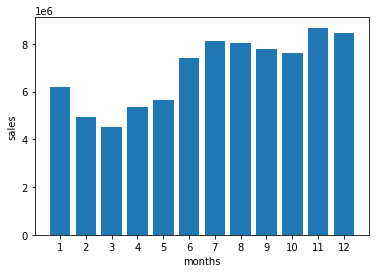

In [16]:
months= range(1,13)
plt.bar(months, best_month['sales'])
plt.xticks(months)
plt.ylabel('sales')
plt.xlabel('months')
plt.show()

In [17]:
# THE district THAT WAS BEST FOR SALES
best_district= df.groupby('District').sum()
best_district

,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,Product Name,Item/Service Description,sales,month
District,,,,,,,,,,,,,,
0,403,574,1254,504,107,2.500,36106.3,22300.012,439,88,115,505,1.783314e+05,135
1,361,601,1175,637,120,2.025,44454.5,26553.574,633,500,129,560,2.129776e+05,169
2,4100,6801,56839,6229,1287,32.900,646101.1,405657.999,6991,3908,1534,6767,2.948356e+06,2029
3,935,1671,9410,1467,296,7.000,145771.9,91362.138,1515,1002,317,1353,7.281356e+05,429
4,352,772,783,607,112,3.025,60748.9,37641.069,765,54,144,586,2.219613e+05,163
5,6049,10900,82119,10362,1953,52.625,969536.9,615347.430,10575,3800,2187,9559,4.461920e+06,3006
6,19727,34170,198324,31463,6049,154.775,3061457.8,1911853.509,32947,16974,6929,30281,1.382780e+07,9378
7,2616,4907,48667,4303,814,21.950,398958.2,246193.577,4540,2521,926,4026,1.864327e+06,1266
8,1682,3208,17617,2748,517,13.150,236349.2,151804.580,2927,940,610,2677,1.064423e+06,797


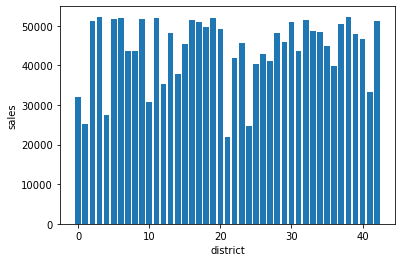

In [19]:
#districts= [District for District in DF.groupby('District')]
sales= df['sales']
X= df['District']
Y= sales
plt.bar(X, Y)
# plt.bar(districts, best_district['sales'])
# plt.xticks(districts, rotation='vertical', size=8)
plt.ylabel('sales')
plt.xlabel('district')
plt.show()

In [42]:
#products that ARE SOLD ON SAME DATE

df['_ProductID_right'] = df['_ProductID_right'].astype('string')
df['OrderDate'] = df['OrderDate'].astype('string')

daf= df[df['OrderDate'].duplicated(keep=False)]
daf['grouped']= daf.groupby('_ProductID_right')['OrderNumber'].transform(lambda x: ','.join(x))
daf= daf[['OrderDate','grouped']].drop_duplicates()
daf.head(10)

,OrderDate,grouped
0,2018-05-31,"SO - 000101,SO - 000217,SO - 000244,SO - 00024..."
1,2018-05-31,"SO - 000102,SO - 000183,SO - 000211,SO - 00023..."
2,2018-05-31,"SO - 000103,SO - 000149,SO - 000153,SO - 00024..."
3,2018-05-31,"SO - 000104,SO - 000131,SO - 000201,SO - 00020..."
4,2018-05-31,"SO - 000105,SO - 000236,SO - 000251,SO - 00028..."
5,2018-05-31,"SO - 000106,SO - 000122,SO - 000137,SO - 00015..."
6,2018-05-31,"SO - 000107,SO - 000190,SO - 000227,SO - 00025..."
7,2018-05-31,"SO - 000108,SO - 000127,SO - 000134,SO - 00016..."
8,2018-06-01,"SO - 000109,SO - 000199,SO - 000275,SO - 00028..."
9,2018-06-01,"SO - 000110,SO - 000125,SO - 000355,SO - 00038..."
